<a id="6"></a>
<center><h1><u>Humpback Whale Identification</h1></u></center>

<a href="https://ibb.co/8gr5HYB"><img src="https://i.ibb.co/HTtzjh2/happy-whale.jpg" alt="happy-whale" border="0"></a>

* **<u>Story about dataset**</u>

1. After centuries of intense whaling, recovering whale populations still have a hard time adapting to warming oceans and struggle to compete every day with the industrial fishing industry for food.

2. To aid whale conservation efforts, scientists use photo surveillance systems to monitor ocean activity. They use the shape of whales’ tails and unique markings found in footage to identify what species of whale they’re analyzing and meticulously log whale pod dynamics and movements. For the past 40 years, most of this work has been done manually by individual scientists, leaving a huge trove of data untapped and underutilized.

3. We'd like to thank Happywhale for providing this data and problem. [Happywhale](https://happywhale.com/) is a platform that uses image process algorithms to let anyone to submit their whale photo and have it automatically identified.

### Revise CNN by watching the given video

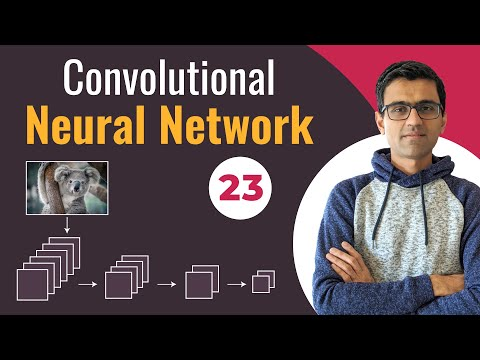

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('zfiSAzpy9NM', width=700, height=400)

📌 **Algorithms used:**  
  * CNN
    
    
📌**Tools used:-**
* Google Colab

📌**Libraries used:-**
* Numpy
* pandas
* Matplotlib
* flask
* scikit-learn
* Keras



<h2><u>Roadmap of the project</h2></u>

* Importing libraries
* Importing the dataset and cleaning it
* Image Processing
* Normalizing the data
* Label Encoding
* Creating and training the model
* Using data augmentation and training
* Evaluating the model

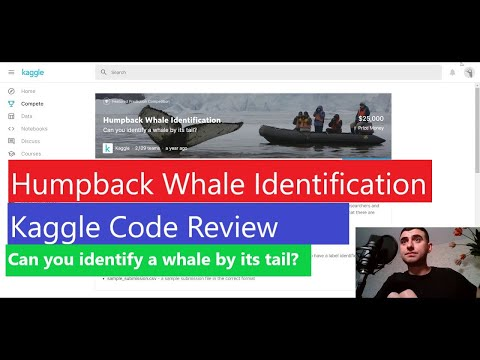

In [ ]:
YouTubeVideo('hTvsJleUdq4', width=700, height=400)

<a id="1"></a> <br>
<a id="6"></a>

<h3><u>Introduction</h3></u>



In this kernel, we will be working on Humpback Whale Identification Dataset (Implementing with Keras).

<a id="6"></a>
* <h3><u>Importing the libraries</h3></u>

1. <u>**NumPy**</u> is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
2. <u>**Pandas**</u> is mainly used for data analysis. Pandas allows importing data from various file formats such as comma-separated values, JSON, SQL database tables or queries, and Microsoft Excel.
3. <u>**Matplotlib.pyplot**</u> is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
4. Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn't warrant raising an exception and terminating the program.


In [1]:
# import all the mentioned libraries
import numpy as np                                    # linear algebra
import pandas as pd                                   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                                       # visualizations
import seaborn as sns
# import warnings
import warnings                                       # to ignore any type of warning
# filter warnings
warnings.filterwarnings('ignore')

The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [2]:
# import drive from google.colab
from google.colab import drive
# mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the directory to the folder of the project.

In [3]:
# move location
%cd "/content/drive/MyDrive/Colab Datasets"

/content/drive/MyDrive/Colab Datasets


### Follow the given steps for downloading the dataset:

* Downlaoad the dataset from here: https://www.kaggle.com/c/humpback-whale-identification/data

* Upload the downloaded zip in your drive folder.

* Unzip the uploaded dataset zip by uncommenting the following command.

* After this, open the unzipped folder and delete train.csv from it.

* Download the train.csv file provided in the course (link: https://drive.google.com/file/d/1WU4yQ5quRfyaGURL1vS79iyy1-IZx6yP/view?usp=sharing) and upload it in the dataset folder (replace original train.csv with the train.csv provided by us)

In [ ]:
#!unzip "/content/drive/MyDrive/Humpback_whale_identification/humpback-whale-identification.zip" -d "/content/drive/MyDrive/Humpback_whale_identification/dataset"

* <h3><u>Importing the required dataset</h3></u>

Read the csv file of train dataset from the uploaded kaggle files.

In [4]:
#Reading the csv file for train dataset
train = pd.read_csv("/content/drive/MyDrive/Colab Datasets/humpback-whale-identification/train.csv")

Print the dataset information using info method.

In [5]:
# The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, column data types,
# memory usage, range index, and the number of cells in each column (non-null values).
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   25361 non-null  object
 1   Id      25361 non-null  object
dtypes: object(2)
memory usage: 396.4+ KB


Print the dataset description using describe method.

In [6]:
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
train.describe()

,Image,Id
count,25361,25361
unique,25361,5005
top,fffde072b.jpg,new_whale
freq,1,9664


# **There are 5005 different classes in our dataset**

Print the dataset shape using shape method.

In [7]:
# shape gives number of rows and columns in a tuple
train.shape

(25361, 2)


Print the first five rows of data using head method.

In [8]:
# head funtion gives the first 5 rows of datasets
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


The data contains the image and its ID.
Print the last five rows of data using tail method.

In [9]:
# tail funtion gives the last 5 rows of datasets
train.tail()

,Image,Id
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885
25360,fffde072b.jpg,new_whale


**We need to identify the Id of whale. So, our output variable will be Id. We need to seperate feature columns and output column.**

In [10]:
# put labels into y_train variable
y_train = train['Id']
# Drop the 'Id' column
xtrain = train.drop(['Id'], axis=1)
y_train.head()

,Id
0,w_f48451c
1,w_c3d896a
2,w_20df2c5
3,new_whale
4,new_whale


Now check for any NAN values in the dataset bu using the isnull method and then applying the sum method.

In [11]:
# Indicates sum of NAN values in our data
train.isnull().sum()

,0
Image,0
Id,0


**So, no row or column data is missing means we don't have to preprocess the data.**

* <h3><u>Image Preprocessing</h3></u>

Import two libraries for processing the images.
* image: for processing images
* preprocess_input: Preprocesses a tensor or Numpy array encoding a batch of images.

In [14]:
# importing the libraries for image preprocessing
#from keras.preprocessing import image
from keras.preprocessing import image
#from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import preprocess_input

Next, define a function for preprocessing the images

In [15]:
#define teh function taking parameters like train,shape,path
def prepareImages(train, shape, path):
    #create a array of 0's np.zeros((shape, 100, 100, 3))
    x_train = np.zeros((shape, 100, 100, 3))
    #set count to 0
    count = 0
    #iterate through training images
    for fig in train['Image']:

        #load images into images of size 100x100x3
        #image.load_img("../input/"+path+"/"+fig, target_size=(100, 100, 3))
        img = image.load_img("/content/drive/MyDrive/Colab Datasets/humpback-whale-identification/"+path+"/"+fig, target_size=(100, 100, 3))
        #convert image to array
        #image.img_to_array(img)
        x = image.img_to_array(img)
        #preprocessx`
        x = preprocess_input(x)
        #add the preprocessed images in the zero array
        #x_train[count] = x
        x_train[count] = x
        #check if count is divisible by 500
        if (count % 500 == 0):
            #print("Processing image: ", count+1, ", ", fig)
            print("Processing image: ", count+1, ", ", fig)
        #increment count
        count += 1
    #return x_train
    return x_train

In [16]:
#apply the above function to training data
x_train = prepareImages(train, train.shape[0], 'train')

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg
Processing image

* <h3><u>Normalizing the data</h3></u>

Normalize the training data by dividing it by 255 (RGB colour images have values of 0 to 255 each). Print the shape of the training data.

In [17]:
# rescaling the dataset
# dividing an image by 255 simply rescales the image from 0-255 to 0-1.
# (Converting it to float from int makes computation convenient too)
x_train = x_train/255.0
print("xtrain shape: ",x_train.shape)

xtrain shape:  (25361, 100, 100, 3)


Now let's view one of the images by plotting it.

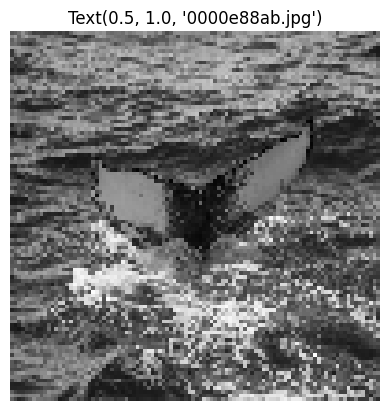

In [18]:
# Checking example input image
#show the first image
plt.imshow(x_train[0][:,:,0], cmap='gray')
#set the title
plt.title(plt.title(train.iloc[0,0]))
#keep axis off
plt.axis('off')
plt.show()


<h3><u>Label Encoding</h3></u>

1. Encode target labels with value between 0 and n_classes-1.
2. This transformer should be used to encode target values, i.e. y, and not the input X.
3. Note:- Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues in the training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.

You will encode the target variable that is the labels that is stored in y_train.

In [19]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#create label encoder object
label_encoder = LabelEncoder()

Next, fit the label encoder to return encoded values using the fit_transform method.

In [20]:
#Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)

Print the first ten values from the encoded labels.

In [21]:
# let's look at first 10 values
y_train[:10]

array([4786, 3808,  662,    0,    0,    0, 4315,    0, 1929, 3237])

Print the shape of the encoded labels.

In [22]:
# finding shape of y_train data
y_train.shape

(25361,)

Convert the encoded labels to one hot encoded labels using the to_categorical method. https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [24]:
# convert to one-hot-encoding
# we got 5005 classes from the function train.Id.describe()
#import to_categorical
from tensorflow.keras.utils import to_categorical
#convert labels to categorical data
y_train = to_categorical(y_train, num_classes=5005)

In [25]:
#display y_train
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

<h3><u>Implementation with Keras using CNN(Convolutional Neural Network)</h3></u>

**Convolutional layer**

1. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

2. When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

3. filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

4. kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

5. strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

6. padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

7. kernel_initializer: Initializer for the kernel weights matrix (see keras.initializers). Defaults to 'glorot_uniform'.

<a href="https://ibb.co/YhhQ8pD"><img src="https://i.ibb.co/XttLpSy/uwHol.gif" alt="uwHol" border="0"></a>

**Padding**

1. When padding == ”VALID”, the input image is not padded. When padding == "VALID", there can be a loss of information and (Input Size != Output Size)

2. When padding == “SAME”, the output size is the same as the input size(when stride=1). Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
3. Size of each feature map = [N-f+2P /S] + 1


**Visualize how padding works**
<br>

<a href="https://ibb.co/NsmXb1k"><img src="https://i.ibb.co/yXYD7hM/padding.gif" alt="padding" border="0"></a>

**Maxpooling2D**

1. Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

2. The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of: output_shape = math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)

3. The resulting output shape when using the "same" padding option is: output_shape = math.floor((input_shape - 1) / strides) + 1

**Dropout layer**

1. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

2. Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.



**Flatten layer**

1. Flattens the input.
2. If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

<u>Import necessary libraries:</u>
* to_categorical: for one hot encoding
* Sequential: groups a linear stack of layers into a tf.keras.Model.
* Dense, Dropout, Flatten, Conv2D, MaxPool2D
* RMSprop,Adam: optimizers
* BatchNormalization : Layer that normalizes its inputs.
* ImageDataGenerator: Generate batches of tensor image data with real-time data augmentation.
* ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.


In [28]:
#import above mentioned libraries
from tensorflow.keras.utils import to_categorical                                      # convert to one-hot-encoding
from keras.models import Sequential                                       # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D                                       # different layers of cnn
from tensorflow.keras.optimizers import RMSprop,Adam                                       # optimizers
from tensorflow.keras.layers import BatchNormalization                                       # to normalize inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator                                       # to generate image samples
from keras.callbacks import ReduceLROnPlateau                                       # adjust learning rate

#create sequential model
model = Sequential()
#add convolution layer 16 filters
model.add(Conv2D(filters = 16, kernel_size=(3, 3), padding = 'Same', activation='relu', input_shape=(100, 100, 3)))
#add convolution layer 16 filters
model.add(Conv2D(filters = 16, kernel_size=(3, 3), padding = 'Same', activation='relu'))
#add max pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
#add batch normalization
model.add(BatchNormalization())

#add convolution layer 32 filters
model.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'Same', activation='relu'))
##add convolution layer 32 filters
model.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'Same', activation='relu'))
#add max pooling layer
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
#add dropout layer
model.add(Dropout(0.25))

#add convolution layer 64 filters
model.add(Conv2D(filters = 64, kernel_size=(3, 3), padding = 'Same', activation='relu'))
#add convolution layer 64 filters
model.add(Conv2D(filters = 64, kernel_size=(3, 3), padding = 'Same', activation='relu'))
#add max pooling layer
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
#add batch normalization
model.add(BatchNormalization())

# fully connected
#add flatten layer
model.add(Flatten())
#add dense layer with relu activation
model.add(Dense(256, activation = "relu"))
#add batch normalization
model.add(BatchNormalization())
#add dense layer with softmax activation
model.add(Dense(y_train.shape[1], activation = "softmax"))

In [29]:
#Provides the summary of model we created
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 50, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5005)                │       1,286,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,719,261 (14.19 MB)

 Trainable params: 3,718,589 (14.19 MB)

 Non-trainable params: 672 (2.62 KB)


<a id="6"></a>
<u>Compile the Model</u>

 **Benefits of Adam:**
* Straightforward to implement.
* Computationally efficient.
* Little memory requirements.
* Invariant to diagonal rescale of the gradients.
* Well suited for problems that are large in terms of data and/or parameters.
* Appropriate for non-stationary objectives.
* Appropriate for problems with very noisy/or sparse gradients.
* Hyper-parameters have intuitive interpretation and typically require little tuning.




[Watch Adam paper here](https://arxiv.org/pdf/1412.6980.pdf)
<br>
<a href="https://ibb.co/fSVKJyY"><img src="https://i.ibb.co/7zxThZJ/adam-algo.jpg" alt="adam-algo" border="0"></a>

Next define the Adam optimizer,keep learning rate as 0.001.

In [30]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

**Learning rate scheduler**


At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

1. **schedule:** a function that takes an epoch index (integer, indexed from 0) and current learning rate (float) as inputs and returns a new learning rate as output (float).

2. **verbose:** int value 0: quiet , 1: update messages.

**ReduceLROnPlateau terms**

1. monitor	quantity to be monitored.
2. factor	factor by which the learning rate will be reduced. new_lr = lr * factor.
3. patience	number of epochs with no improvement after which learning rate will be reduced.
4. verbose	int. 0: quiet, 1: update messages.
5. min_delta	threshold for measuring the new optimum, to only focus on significant changes.
6. min_lr	lower bound on the learning rate.

<a href="https://ibb.co/NKWPRkX"><img src="https://i.ibb.co/tDYtRNS/lr-on-plateau.png" alt="lr-on-plateau" border="0"></a>

In [31]:
# Set a learning rate scheduler
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

**Compiler terms**

1. optimizer: String (name of optimizer) or optimizer instance.

2. loss: A loss function is any callable with the signature loss = fn(y_true, y_pred), where y_true are the ground truth values, and y_pred are the model's predictions. y_true should have shape (batch_size, d0, .. dN) (except in the case of sparse loss functions such as sparse categorical crossentropy which expects integer arrays of shape (batch_size, d0, .. dN-1)). y_pred should have shape (batch_size, d0, .. dN).

3. metrics: List of metrics to be evaluated by the model during training and testing.

4. loss_weights: Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. The loss value that will be minimized by the model will then be the weighted sum of all individual losses, weighted by the loss_weights coefficients.

5. run_eagerly: Bool. Defaults to False.

6. steps_per_execution: (Default value of steps_er_epochs=1). The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on small models. At most, one full epoch will be run each execution. If a number larger than the size of the epoch is passed, the execution will be truncated to the size of the epoch.

7. **kwargs: Arguments supported for backwards compatibility only.


In [32]:
#compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<h3><u>Data Augmentation</h3></u>

Lets use Data augmentation:-
1. Data augmentation are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.
2. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [33]:
# With data augmentation to prevent overfitting


datagen = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range=10,                    # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                     # Randomly zoom image
        width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)                               # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,               # randomly flip images horizontally
        horizontal_flip=True,                 # randomly flip images horizontally
        vertical_flip=False)                  # randomly flip images vertically

#fit the training data
datagen.fit(x_train)

**Epochs and Batch Size**

1. Stochastic gradient descent is an iterative learning algorithm that uses a training dataset to update a model.
2. The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
3. The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

In [34]:
#set epochs to 50
epochs = 50                         # for better result increase the number of epochs
#set batch size to 64
batch_size = 64

<a id="6"></a>
<p style="background-color:#615154;font-family:newtimeroman;color:#CABFC1;font-size:250%;text-align:center;border-radius:40px 40px;">Fit the Model</p>

When we call the .fit_generator() function it makes assumptions:
1. Keras is first calling the generator function(dataAugmentaion)
2. Generator function(dataAugmentaion) provides a batch_size of 32 to our .fit_generator() function.
3. our .fit_generator() function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.
4. For the number of epochs specified the process is repeated.
5. fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
#fit using fit_generator
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/50
171/171 - 29s - loss: 7.3925 - accuracy: 0.2816 - lr: 0.0010 - 29s/epoch - 172ms/step
Epoch 2/50
171/171 - 28s - loss: 5.5855 - accuracy: 0.3732 - lr: 0.0010 - 28s/epoch - 166ms/step
Epoch 3/50
171/171 - 28s - loss: 5.0902 - accuracy: 0.3826 - lr: 0.0010 - 28s/epoch - 166ms/step
Epoch 4/50
171/171 - 28s - loss: 4.7770 - accuracy: 0.3834 - lr: 0.0010 - 28s/epoch - 165ms/step
Epoch 5/50
171/171 - 28s - loss: 4.5017 - accuracy: 0.3823 - lr: 0.0010 - 28s/epoch - 165ms/step
Epoch 6/50
171/171 - 28s - loss: 4.2281 - accuracy: 0.3818 - lr: 0.0010 - 28s/epoch - 164ms/step
Epoch 7/50
171/171 - 28s - loss: 3.9900 - accuracy: 0.3813 - lr: 0.0010 - 28s/epoch - 167ms/step
Epoch 8/50
171/171 - 28s - loss: 3.7160 - accuracy: 0.3829 - lr: 0.0010 - 28s/epoch - 166ms/step
Epoch 9/50
171/171 - 28s - loss: 3.4551 - accuracy: 0.3856 - lr: 0.0010 - 28s/epoch - 165ms/step
Epoch 10/50
171/171 - 28s - loss: 3.1838 - accuracy: 0.3941 - lr: 0.0010 - 28s/epoch - 165ms/step
Epoch 11/50
171/171 - 28s - l

<h3><u>Evaluate the model</h3></u>

Plot the training loss to understand how well the model has performed.



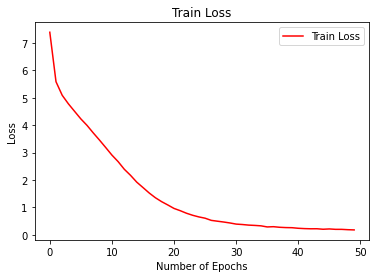

In [ ]:
# Plot the loss curve for training
# plot loss from history
plt.plot(history.history['loss'], color='r', label='Train Loss')
# set title
plt.title("Train Loss")
# set x label as number of epochs
plt.xlabel('Number of Epochs')
# set y label as loss
plt.ylabel('Loss')
#plot legend and show
plt.legend()
plt.show()

Next plot the training accuracy in similar manner

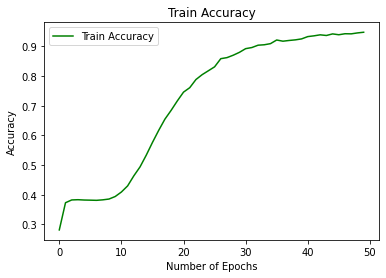

In [ ]:
# Plot the accuracy curve for training
#plot accuracy from history
plt.plot(history.history['accuracy'], color='g', label='Train Accuracy')
#set title
plt.title("Train Accuracy")
#set x label as number of epochs
plt.xlabel('Number of Epochs')
#set y label as accuracy
plt.ylabel('Accuracy')
#plot legend and show
plt.legend()
plt.show()

Thats good, the training loss is continously decreasing and accuracy is increasing. Lets check the training accuracy and loss.

In [ ]:
# finding the training accuracy
print("Train accuracy of the model: ", history.history['accuracy'][-1])

Train accuracy of the model:  0.9473780989646912


In [ ]:
# finding the training loss
print("Train loss of the model: ", history.history['loss'][-1])

Train loss of the model:  0.17460012435913086


Congratulations!!! You've done it.

In this assignment you learned you applied CNNs to solve the Humpback whale identification problem.


Keep practising!!<br><br>

## Do fill the feedback form given below:
## [Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)

![](https://www.mememaker.net/static/images/memes/4821703.jpg)

<br><br> See you then!!


